In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Nimish\Desktop\CSV files\heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

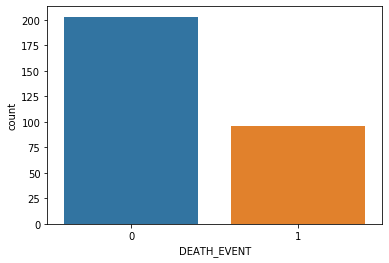

In [4]:
sns.countplot(x='DEATH_EVENT', data=df )

In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


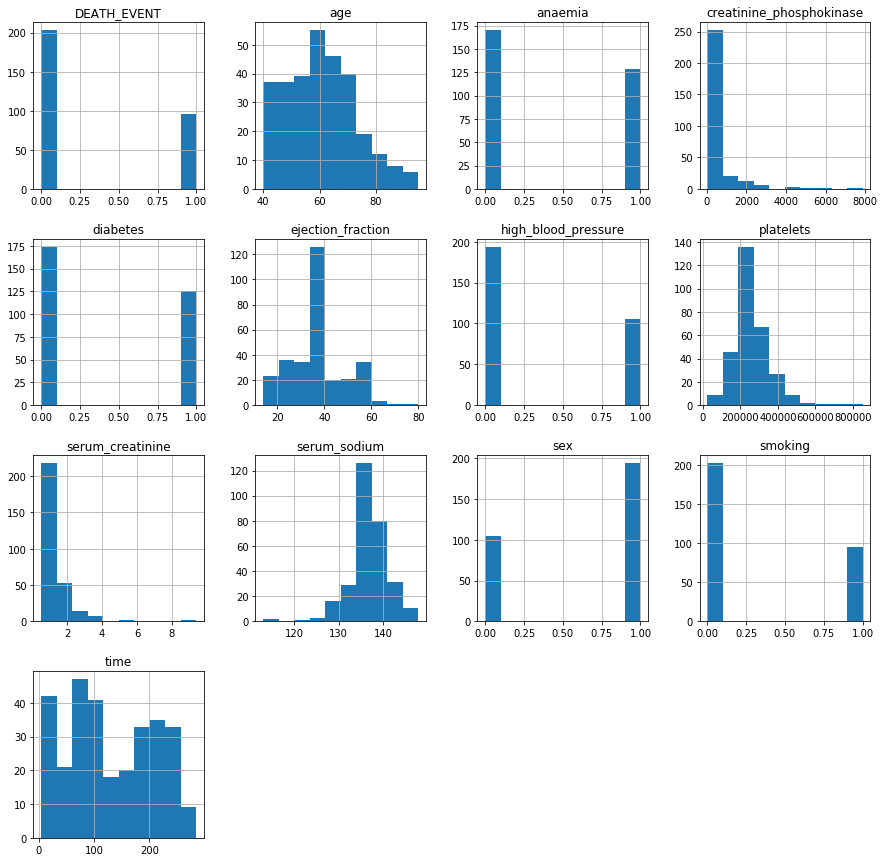

In [7]:
df.hist(figsize=(15,15))
plt.show()

In [8]:
print(df.groupby('age')['DEATH_EVENT'].value_counts())

age   DEATH_EVENT
40.0  0              7
41.0  0              1
42.0  0              6
      1              1
43.0  0              1
                    ..
87.0  1              1
90.0  1              2
      0              1
94.0  1              1
95.0  1              2
Name: DEATH_EVENT, Length: 73, dtype: int64


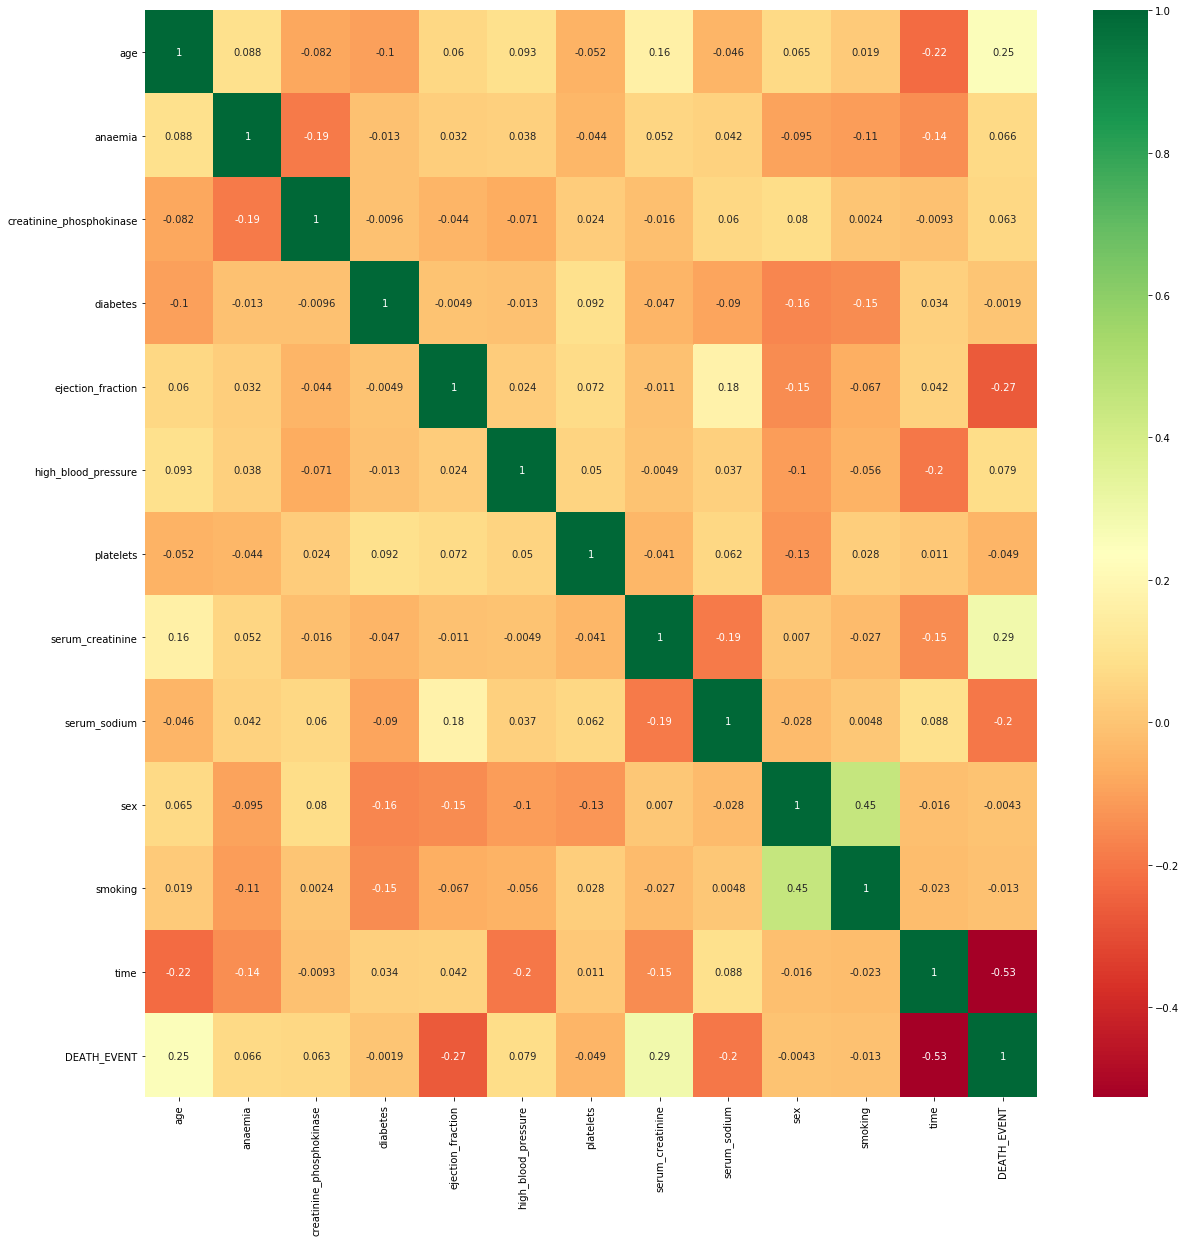

In [9]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='RdYlGn')

In [10]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
# df.drop(['age', 'creatinine_phosphokinase'], axis=1, inplace=True)

In [12]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.model_selection import train_test_split
from  sklearn.model_selection import cross_val_score

In [14]:
X = df.drop('DEATH_EVENT', axis=1)

In [15]:
y = df['DEATH_EVENT']

In [16]:
y.shape

(299,)

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
etr = ExtraTreesClassifier()

In [18]:
etr.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [19]:
feature_importance = etr.feature_importances_

In [20]:
feature_importance

array([0.09793806, 0.02482507, 0.07012355, 0.03070927, 0.13011551,
       0.02336241, 0.07098268, 0.12313454, 0.08306892, 0.02645063,
       0.02588881, 0.29340054])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [22]:
knn_score = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10)
    knn_score.append(score.mean())

In [23]:
knn_score

[0.5683908045977011,
 0.6454022988505747,
 0.5817241379310344,
 0.655287356321839,
 0.6419540229885057,
 0.6588505747126436,
 0.6354022988505746,
 0.648735632183908,
 0.6286206896551724,
 0.659080459770115,
 0.6588505747126436,
 0.6689655172413793,
 0.6689655172413793,
 0.6722988505747127,
 0.675632183908046,
 0.675632183908046,
 0.6656321839080459,
 0.6722988505747127,
 0.6722988505747127,
 0.675632183908046]

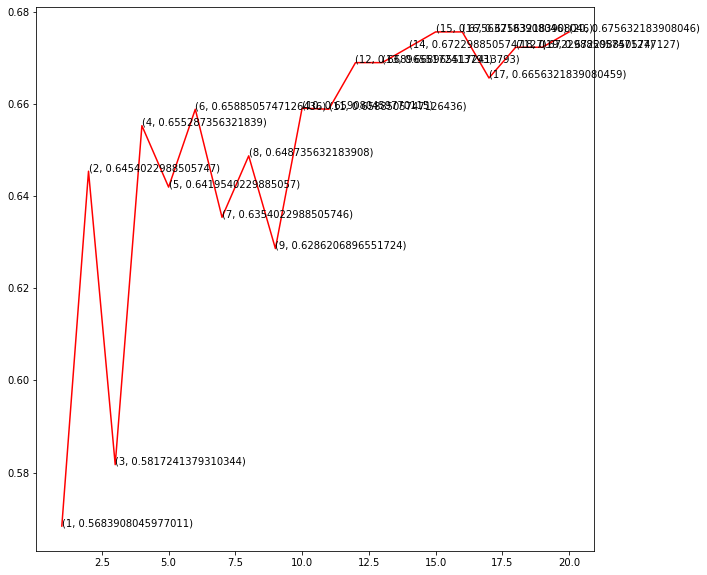

In [24]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1,21)], knn_score, color='red')
for i in range(1, 21):
    plt.text(i, knn_score[i-1], (i, knn_score[i-1]))
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [26]:
y_pred = knn.predict(X_test)

In [27]:
knn.score(X_test, y_test)

0.5666666666666667

## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier()

In [30]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred = rf.predict(X_test)

In [32]:
rf.score(X_test, y_test)

0.85

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_pred, y_test))

[[36  8]
 [ 1 15]]


### Hyper Parameter Optimization

In [34]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

In [35]:
parameters = {
    'learning_rate' : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth' : [3, 4, 5 , 6, 8, 10, 12, 15], 
    'min_child_weight' : [1, 3, 5, 7] ,
    'gamma'            : [0.0, 0.1, 0.2, 0.3, 0.4] ,
    'colsample_bytree' : [0.3, 0.4, 0.5, 0.7]
    
}

In [36]:
classifier = xgboost.XGBClassifier()

In [37]:
clf = RandomizedSearchCV(classifier, param_distributions = parameters, cv = 5, verbose=3, n_jobs=-1, n_iter=5)

In [38]:
clf.fit(X_train , y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    6.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jo

In [39]:
print(clf.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [40]:
clf.best_params_

{'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [41]:
model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_pred = model.predict(X_test)

In [44]:
model.score(X_test, y_test)

0.8666666666666667

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [46]:
print(confusion_matrix(y_pred, y_test))

[[35  6]
 [ 2 17]]


In [47]:
print(accuracy_score(y_pred, y_test))

0.8666666666666667


## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt = DecisionTreeClassifier(max_depth=4)

In [50]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
y_pred = dt.predict(X_test)

In [52]:
dt.score(X_test, y_test)

0.7666666666666667

In [53]:
parameters = {
    'learning_rate' : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth' : [3, 4, 5 , 6, 8, 10, 12, 15], 
    'min_child_weight' : [1, 3, 5, 7] ,
    'gamma'            : [0.0, 0.1, 0.2, 0.3, 0.4] ,
    'colsample_bytree' : [0.3, 0.4, 0.5, 0.7]
    
}

### Optimizing the Decision Tree

In [54]:
classifier = xgboost.XGBClassifier()

In [55]:
clf = RandomizedSearchCV(classifier, param_distributions = parameters, cv = 5, verbose=3, n_jobs=-1, n_iter=5)

In [56]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jo

In [57]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
clf.best_params_

{'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [59]:
model= xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
model.score(X_test, y_test)

0.8166666666666667

> From the Above Test it is clear that Random Forest Regressor produces the most accurate result.